In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

## Model Objective
Given the data of a particular IT employ, predict the yearly gross saalary 

## Información del Dataset
link https://www.kaggle.com/datasets/lorenzovzquez/data-jobs-salaries/?select=salaries.csv

This dataset was retrieved from the page https://ai-jobs.net/salaries/download/

This site collects salary information anonymously from professionals all over the world in the AI, ML, Data Science space and makes it publicly available for anyone to use, share and play around with.

The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

### Dataset description
The dataset contains 11 columns with the following characteristics:

**work_year**: The year the salary was paid. --> Encoding will be applyed 

**experience_level**: The experience level in the job during the year with the following possible values:
* EN: Entry-level / Junior --> will be 1 after encoding
* MI: Mid-level / Intermediate --> will be 2 after encoding
* SE: Senior-level / Expert --> will be 3 after encoding
* EX: Executive-level / Director --> will be 4 after encoding

**employment_type**: The type of employement for the role:
* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelance

**job_title**: The role worked in during the year.

**salary**: The total gross salary amount paid.

**salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

**salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).

**employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.

**remote_ratio**: The overall amount of work done remotely, possible values are as follows:
* 0: No remote work (less than 20%) --> will be 1 after encoding
* 50: Partially remote/hybrid --> will be 2 after encoding
* 100: Fully remote (more than 80%) --> will be 3 after encoding

**company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.

**company_size**: The average number of people that worked for the company during the year:
* S: less than 50 employees (small) --> will be 1 after encoding
* M: 50 to 250 employees (medium) --> will be 2 after encoding
* L: more than 250 employees (large) --> will be 3 after encoding

## General overview of the data set

In [406]:
df = pd.read_csv("salaries.csv")

In [407]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8113 non-null   int64 
 1   experience_level    8113 non-null   object
 2   employment_type     8113 non-null   object
 3   job_title           8113 non-null   object
 4   salary              8113 non-null   int64 
 5   salary_currency     8113 non-null   object
 6   salary_in_usd       8113 non-null   int64 
 7   employee_residence  8113 non-null   object
 8   remote_ratio        8113 non-null   int64 
 9   company_location    8113 non-null   object
 10  company_size        8113 non-null   object
dtypes: int64(4), object(7)
memory usage: 697.3+ KB


In [409]:
#separate columns in numerical and categorical
categorical_columns = df.select_dtypes(include="object").columns.values
numerical_columns = df.select_dtypes(include="int64").columns.values

In [410]:
#possible values of categorical columns
for c in categorical_columns:
    print("------------------")
    print(c,df[c].unique())
    print("------------------")

------------------
experience_level ['SE' 'EN' 'MI' 'EX']
------------------
------------------
employment_type ['FT' 'CT' 'PT' 'FL']
------------------
------------------
job_title ['Data Scientist' 'Machine Learning Engineer' 'ML Engineer'
 'Data Engineer' 'Data Analyst' 'AI Developer' 'BI Developer'
 'Research Scientist' 'AI Programmer' 'Data Lead' 'Data Product Manager'
 'Decision Scientist' 'Data Science Consultant' 'Financial Data Analyst'
 'AI Engineer' 'Business Intelligence Engineer' 'Data Architect'
 'Business Intelligence Analyst' 'Applied Scientist'
 'Data Quality Analyst' 'Research Analyst' 'Data Science Engineer'
 'Analytics Engineer' 'Data Strategy Manager' 'Data Manager'
 'Machine Learning Scientist' 'Computer Vision Engineer'
 'Data Visualization Specialist' 'Research Engineer'
 'Data Science Manager' 'BI Analyst' 'Insight Analyst'
 'Data Integration Specialist' 'Data Science Practitioner'
 'Director of Data Science' 'Data Specialist'
 'Data Visualization Engineer' 'Da

In [411]:
#change " " for "_" and upper to lower in categorical columns
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
display(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,se,ft,data_scientist,199000,usd,199000,us,0,us,m
1,2023,se,ft,data_scientist,196760,usd,196760,us,0,us,m
2,2023,se,ft,machine_learning_engineer,90000,usd,90000,co,0,co,m
3,2023,se,ft,machine_learning_engineer,70000,usd,70000,co,0,co,m
4,2023,se,ft,ml_engineer,324000,usd,324000,us,0,us,m
...,...,...,...,...,...,...,...,...,...,...,...
8108,2020,se,ft,data_scientist,412000,usd,412000,us,100,us,l
8109,2021,mi,ft,principal_data_scientist,151000,usd,151000,us,100,us,l
8110,2020,en,ft,data_scientist,105000,usd,105000,us,100,us,s
8111,2020,en,ct,business_data_analyst,100000,usd,100000,us,100,us,l


In [412]:
#unique values of job_title columns
print("total job titles unique values", len(df["job_title"].unique()))
display(df["job_title"].unique())

total job titles unique values 119


array(['data_scientist', 'machine_learning_engineer', 'ml_engineer',
       'data_engineer', 'data_analyst', 'ai_developer', 'bi_developer',
       'research_scientist', 'ai_programmer', 'data_lead',
       'data_product_manager', 'decision_scientist',
       'data_science_consultant', 'financial_data_analyst', 'ai_engineer',
       'business_intelligence_engineer', 'data_architect',
       'business_intelligence_analyst', 'applied_scientist',
       'data_quality_analyst', 'research_analyst',
       'data_science_engineer', 'analytics_engineer',
       'data_strategy_manager', 'data_manager',
       'machine_learning_scientist', 'computer_vision_engineer',
       'data_visualization_specialist', 'research_engineer',
       'data_science_manager', 'bi_analyst', 'insight_analyst',
       'data_integration_specialist', 'data_science_practitioner',
       'director_of_data_science', 'data_specialist',
       'data_visualization_engineer', 'data_modeler', 'head_of_data',
       'etl_develo

## Grouping by Job Title Cryteria:

In our dataset we have 119 different positions, and probably, for some positions we will have just a few samples. Given this, we will group similar positions under the same group. In this way pur model will have much sence and it will be more robust. 

We are going to differenciate between the following positions:

* Data Analyst 
* Data Engineers 
* Machine Learning Engineer 
* Artificial Intelligent Engineer
* Data Scientist 
* Data Architect 
* Business Intelligence Engineer
* Data and Analytics Manager 

The selection is base on the folowing article: https://www.mygreatlearning.com/blog/different-data-science-jobs-roles-industry/. 

This article explain really well the difference between each position and it's up to date. Also, the classfication is not that extend. Despite it could be more positions, and all the positions could have small differences, at some point we need to group those rols whcih are really similar, as explaines before. 

## Data Preparation

In [413]:
#drop salary and salary currancy
df=df.drop(["salary","salary_currency"], axis=1)
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


In [376]:
# Transform categorical jeraquical columns to ordinal
df["work_year"] = df["work_year"].replace({2020:1, 2021:2, 2022:3, 2023:4})
df["experience_level"] = df["experience_level"].replace({'se':1, 'en':2, 'mi':3, 'ex':4})
df["company_size"] = df["company_size"].replace({'s':1, 'm':2, 'l':3})
df["remote_ratio"] = df["remote_ratio"].replace({0:1, 50:2, 100:3})
display(df)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,4,1,ft,data_scientist,199000,us,1,us,2
1,4,1,ft,data_scientist,196760,us,1,us,2
2,4,1,ft,machine_learning_engineer,90000,co,1,co,2
3,4,1,ft,machine_learning_engineer,70000,co,1,co,2
4,4,1,ft,ml_engineer,324000,us,1,us,2
...,...,...,...,...,...,...,...,...,...
8108,1,1,ft,data_scientist,412000,us,3,us,3
8109,2,3,ft,principal_data_scientist,151000,us,3,us,3
8110,1,2,ft,data_scientist,105000,us,3,us,1
8111,1,2,ct,business_data_analyst,100000,us,3,us,3


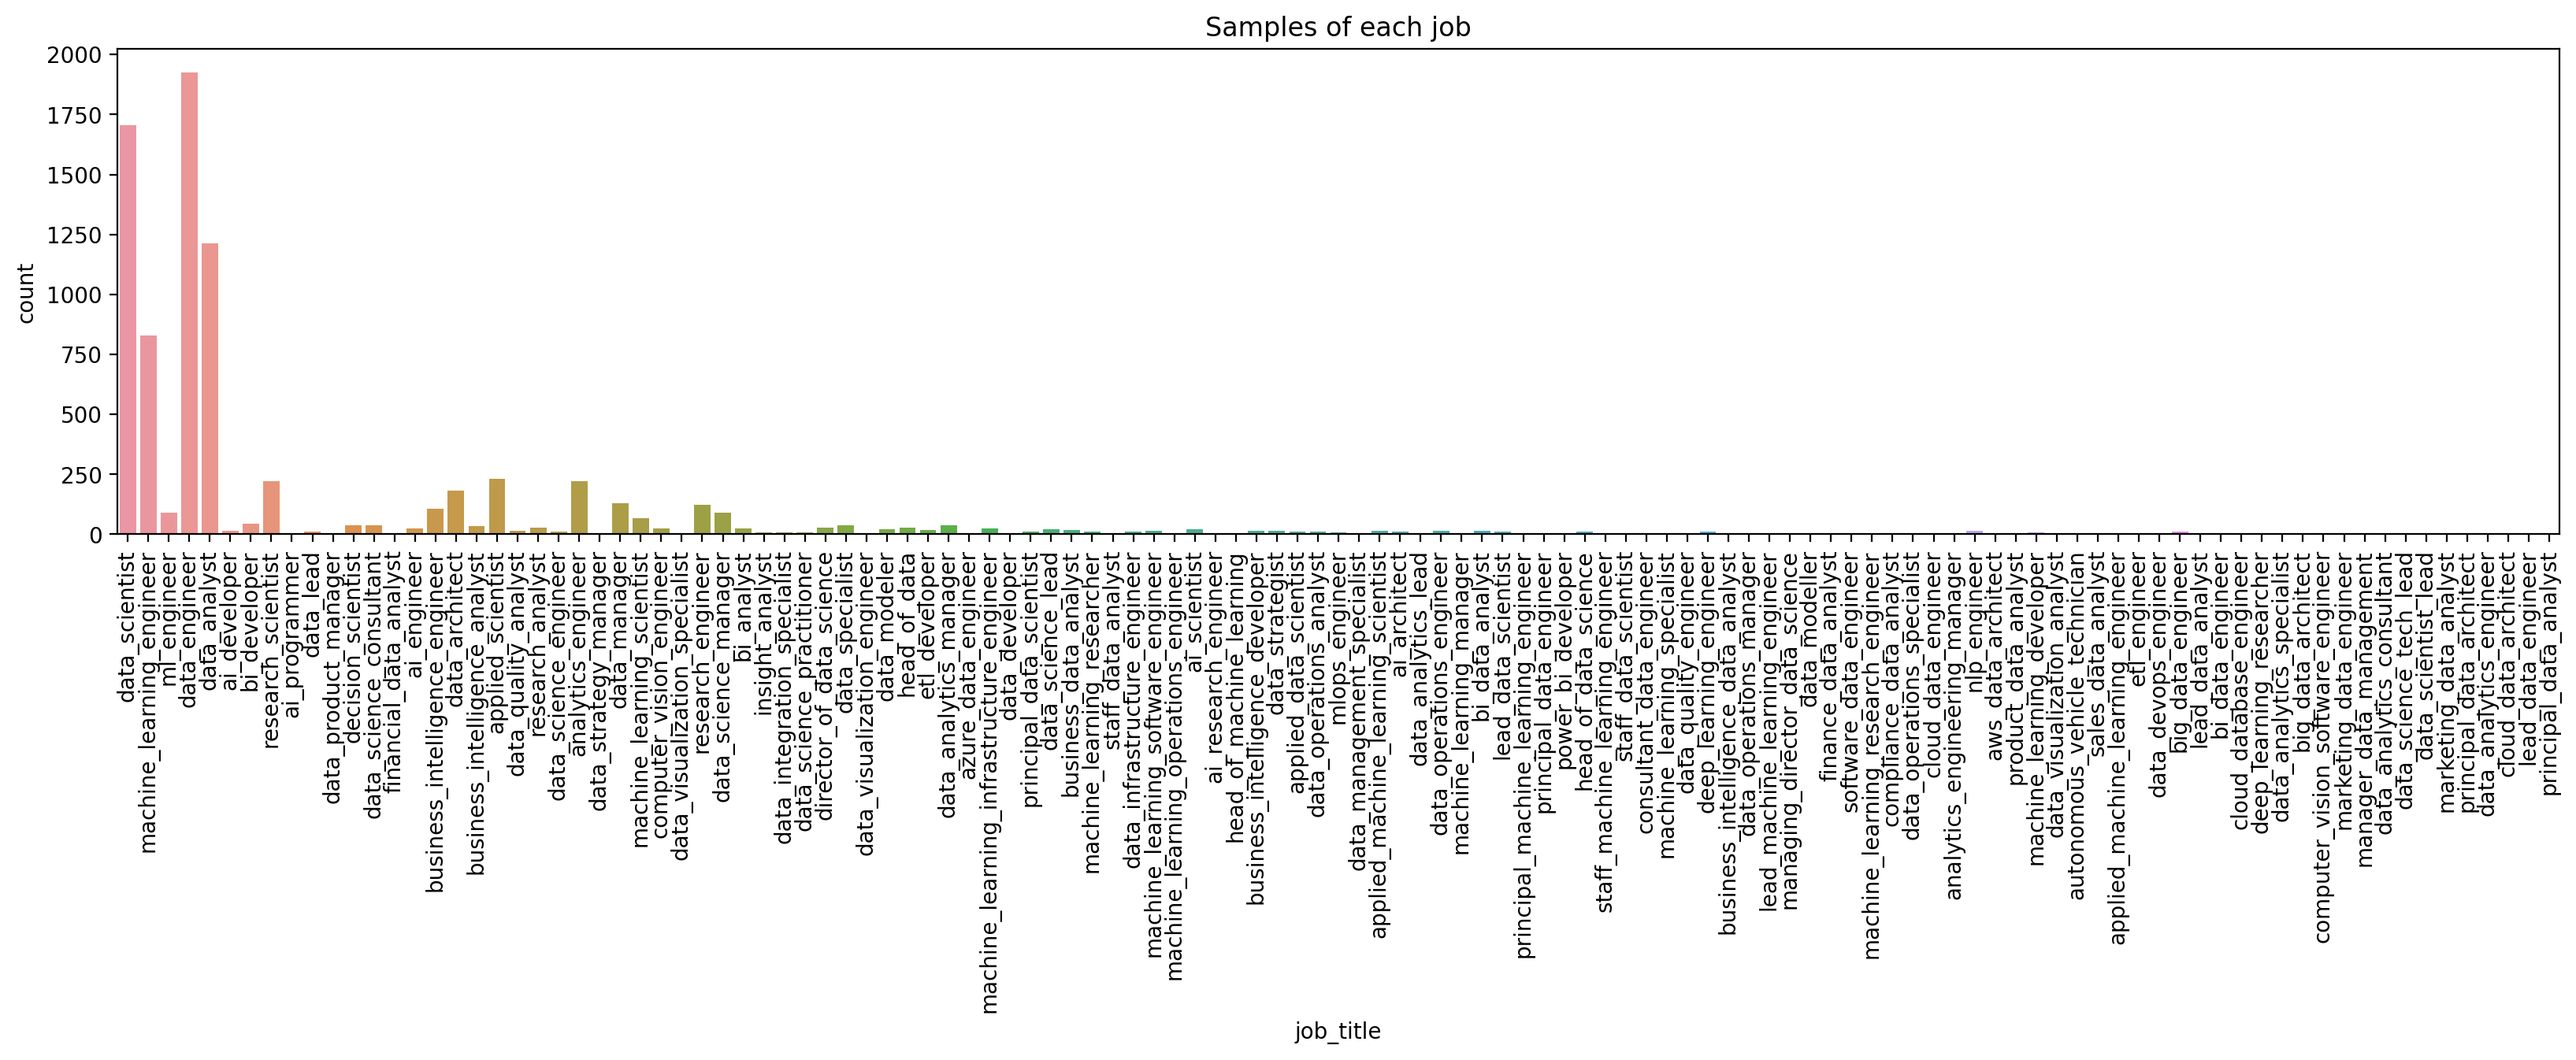

In [377]:
#See all the job titles and distribution
plt.figure(figsize=(20,4),dpi=200)
plt.title("Samples of each job")
sns.countplot(data=df,x="job_title")
plt.xticks(rotation=90);

In [378]:
#see main job_titles
jobs = df.job_title.unique()
total_samples_job = {"job":[],"total_count":[]}
for job in jobs:
    total_samples_job["total_count"].append(len(df[df["job_title"]==job]["job_title"]))
    total_samples_job["job"].append(job)
total_samples_job = pd.DataFrame(total_samples_job)
jobs_spectrum = total_samples_job[total_samples_job["total_count"]>40].job.unique()
print(jobs_spectrum)

['data_scientist' 'machine_learning_engineer' 'ml_engineer'
 'data_engineer' 'data_analyst' 'bi_developer' 'research_scientist'
 'business_intelligence_engineer' 'data_architect' 'applied_scientist'
 'analytics_engineer' 'data_manager' 'machine_learning_scientist'
 'research_engineer' 'data_science_manager']


In [379]:
#function for classify job_title column according above cryteria
def classify_job_title(job_title):
    if ((job_title == "data_analyst") | (job_title == "staff_data_analyst")
       |(job_title == "data_operations_analyst")|(job_title == "product_data_analyst") 
       |(job_title == "data_visualization_analyst")|(job_title == "marketing_data_analyst")):
        return "data_analyst"
    elif ((job_title == "data_engineer")):
        return "data_engineer"
    elif ((job_title == "machine_learning_engineer") | (job_title == "ml_engineer")
        |(job_title == "machine_learning_scientist") | (job_title == "machine_learning_specialist")
        |(job_title == "machine_learning_researcher") | (job_title == "machine_learning_software_engineer")
        |(job_title == "applied_machine_learning_scientist") | (job_title == "machine_learning_research_engineer") 
        |(job_title == "machine_learning_developer")):
        return "machine_learning_engineer"
    elif ((job_title == "ai_developer") | (job_title == "ai_programmer")
        |(job_title == "ai_engineer") | (job_title == "deep_learning_engineer")
        |(job_title == "computer_vision_software_engineer") | (job_title == "deep_learning_researcher")
        |(job_title == "ai_research_engineer") | (job_title == "ai_scientist")
        |(job_title == "computer_vision_engineer")):
        return "artificial_intelligence_engineer"
    elif ((job_title == "data_scientist") | (job_title == "principal_data_scientist")
        |(job_title == "data_science_engineer")):
        return "data_scientist"
    elif ((job_title == "data_architect") | (job_title == "data_infrastructure_engineer")
        |(job_title == "machine_learning_infrastructure_engineer") | (job_title == "ai_architect")
        |(job_title == "cloud_data_engineer") | (job_title == "aws_data_architect")
        |(job_title == "cloud_database_engineer") | (job_title == "big_data_architect")
        |(job_title == "principal_data_architect") | (job_title == "cloud_data_architect")):
        return "data_architect"
    elif ((job_title == "business_analyst") | (job_title == "business_intelligence_engineer")
        |(job_title == "business_intelligence_analyst") | (job_title == "bi_analyst")
        |(job_title == "business_data_analyst") |(job_title == "bi_data_analyst") 
        |(job_title == "business_intelligence_data_analyst")):
        return "business_intelligence_engineer"
    elif ((job_title == "data_and_analytics_manager") | (job_title == "data_lead") 
        | (job_title == "data_strategy_manager") | (job_title == "data_manager")
        | (job_title == "data_science_manager") | (job_title == "data_scientist_lead")
        | (job_title == "data_analytics_manager") | (job_title == "data_analytics_lead")
        | (job_title == "lead_data_engineer") | (job_title == "data_science_lead")
        | (job_title == "lead_data_scientist")):
        return "data_and_analytics_manager"
    else:
        return "other"

In [380]:
#classify list of jobs in the ones choosen for the classfification
df["job_title"] = df["job_title"].apply(classify_job_title)
df = df[df["job_title"] != "other"]
print(df["job_title"].unique())
df.info()

['data_scientist' 'machine_learning_engineer' 'data_engineer'
 'data_analyst' 'artificial_intelligence_engineer'
 'data_and_analytics_manager' 'business_intelligence_engineer'
 'data_architect']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 0 to 8112
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           6803 non-null   int64 
 1   experience_level    6803 non-null   int64 
 2   employment_type     6803 non-null   object
 3   job_title           6803 non-null   object
 4   salary_in_usd       6803 non-null   int64 
 5   employee_residence  6803 non-null   object
 6   remote_ratio        6803 non-null   int64 
 7   company_location    6803 non-null   object
 8   company_size        6803 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 531.5+ KB


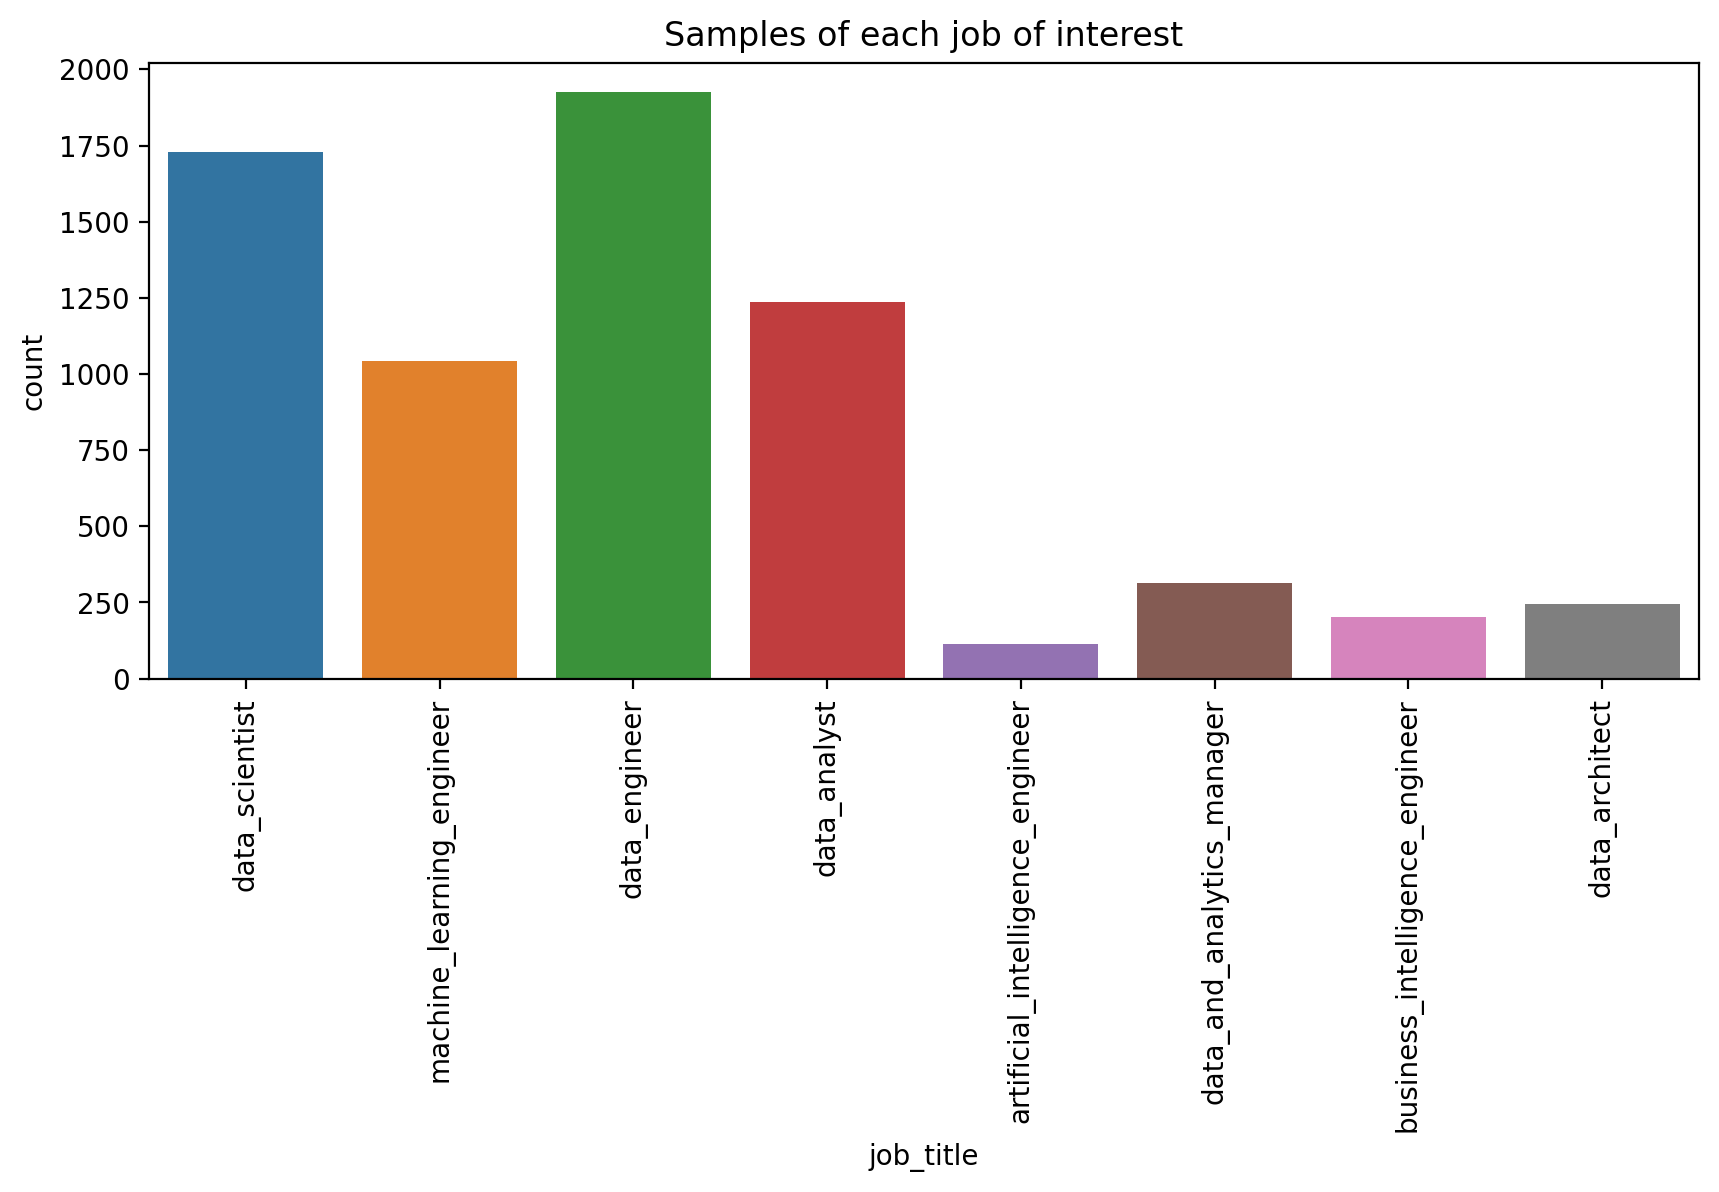

In [381]:
#plot new job title distribution
plt.figure(figsize=(10,4),dpi=200)
plt.title("Samples of each job of interest")
sns.countplot(data=df,x="job_title")
plt.xticks(rotation=90);

## Exploratory data analysis in full train set

In [382]:
#Exploratory data analysis in full train set
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

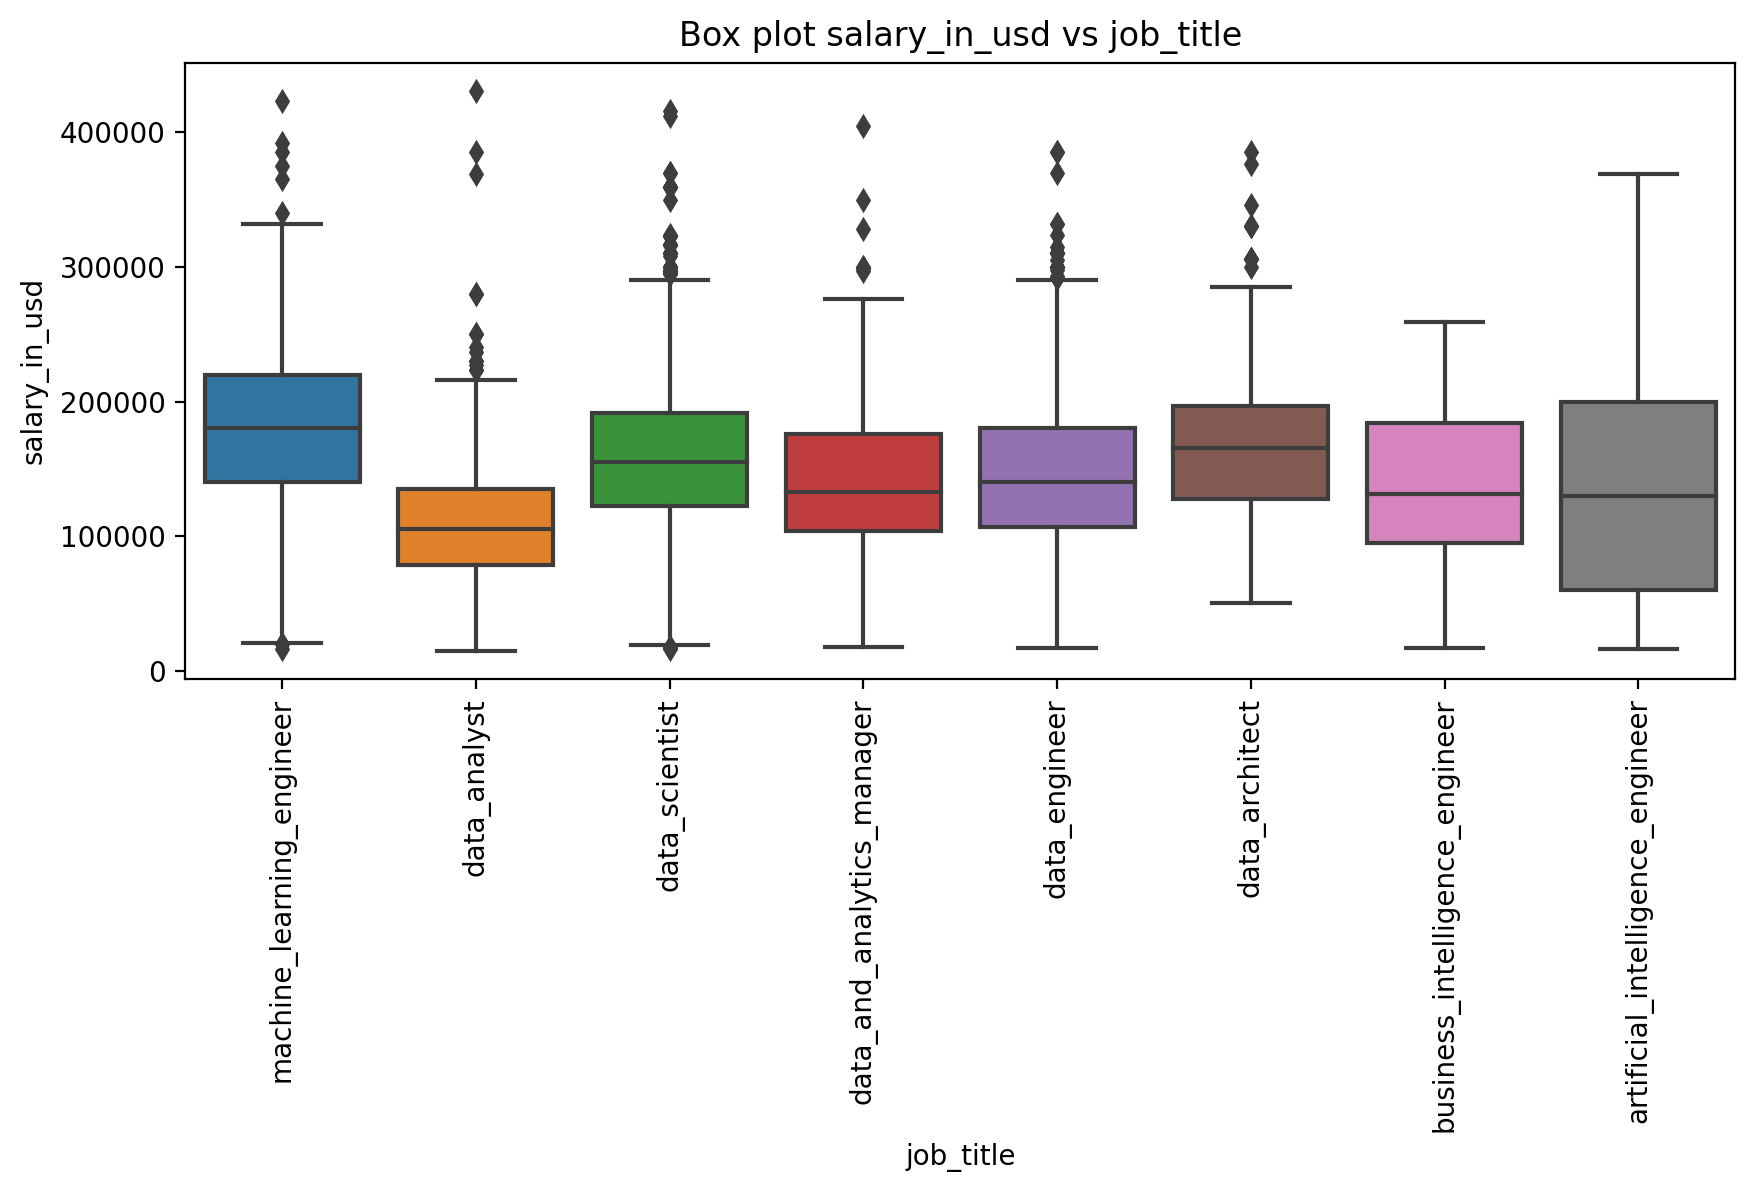

In [383]:
#bar plot salary vs job_title
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_full_train,y='salary_in_usd',x='job_title')
plt.title("Box plot salary_in_usd vs job_title")
plt.xticks(rotation=90);

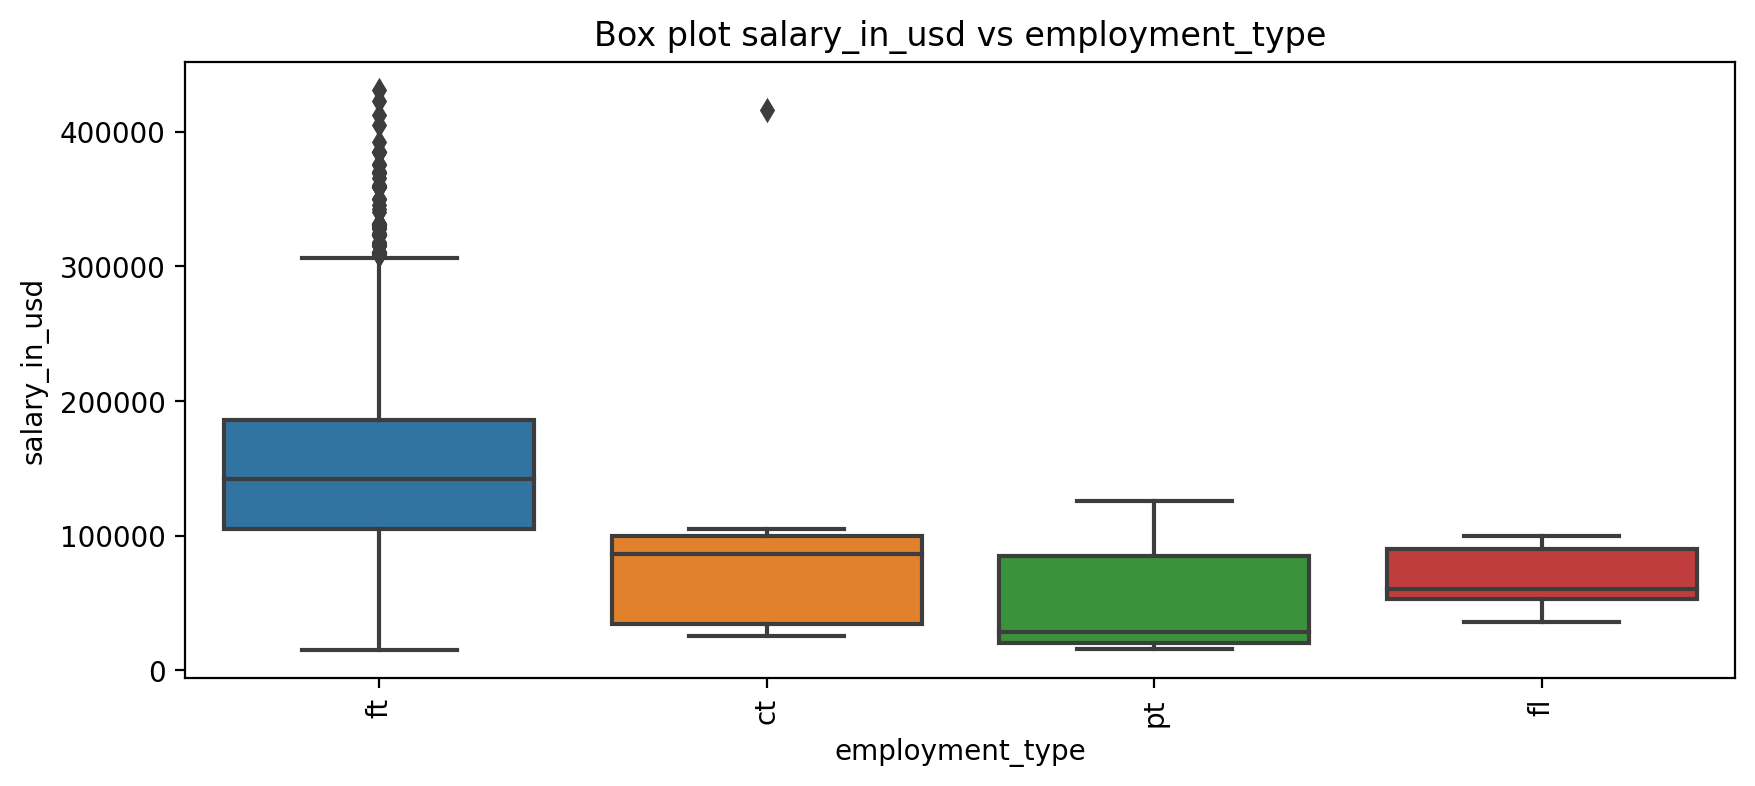

In [384]:
#Box plot salary vs employment_type
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_full_train,y='salary_in_usd',x='employment_type')
plt.title("Box plot salary_in_usd vs employment_type")
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Box plot salary_in_usd vs experience_level')

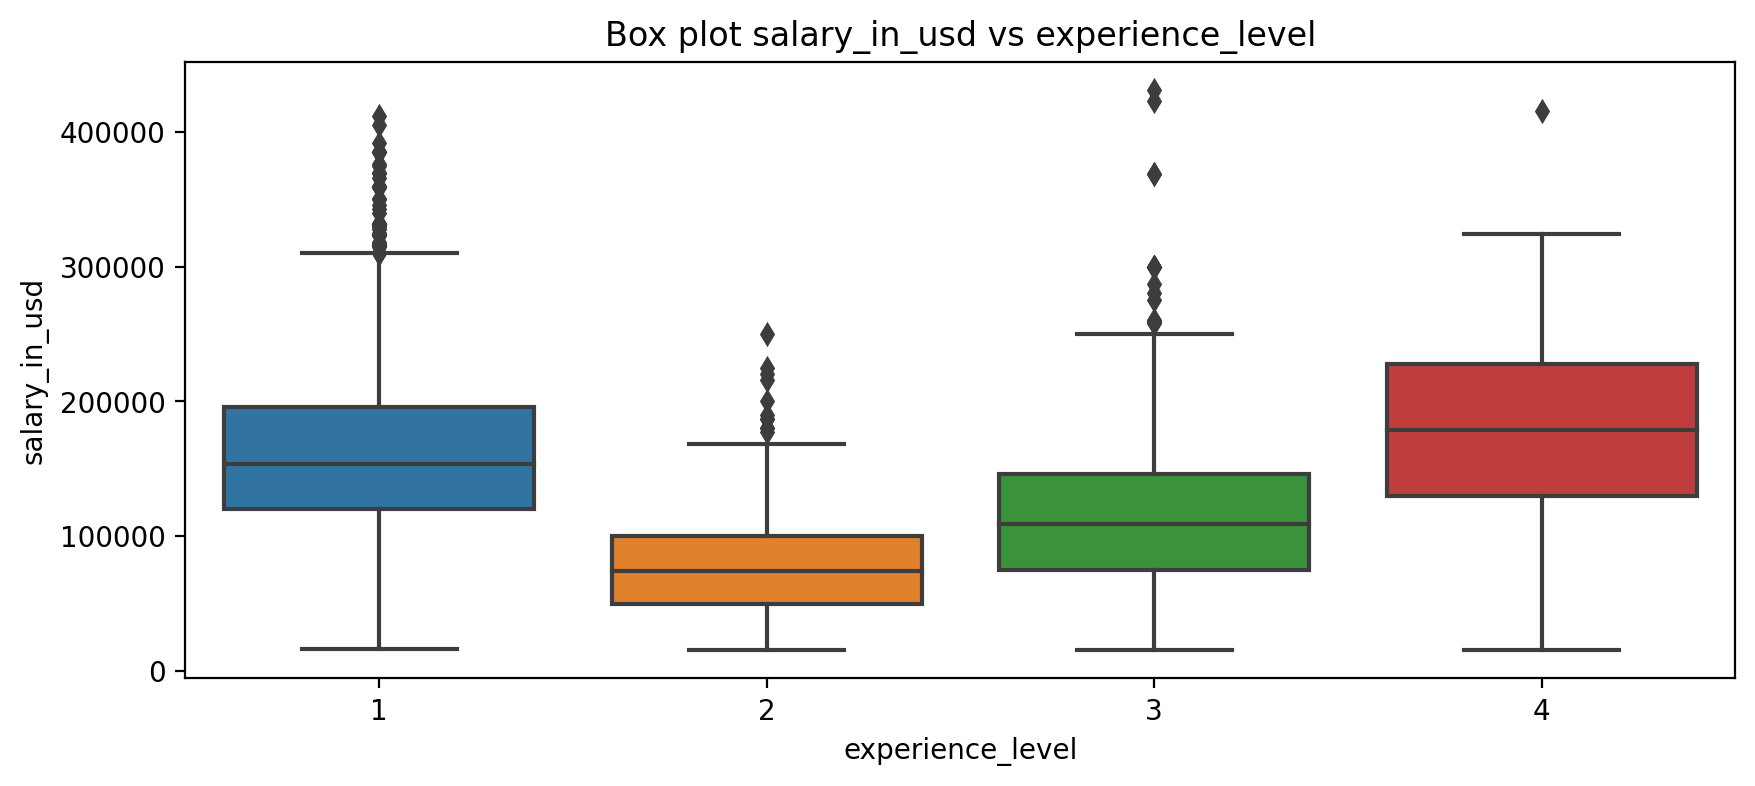

In [385]:
#Box plot salary vs experience
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_full_train,y='salary_in_usd',x='experience_level')
plt.title("Box plot salary_in_usd vs experience_level")

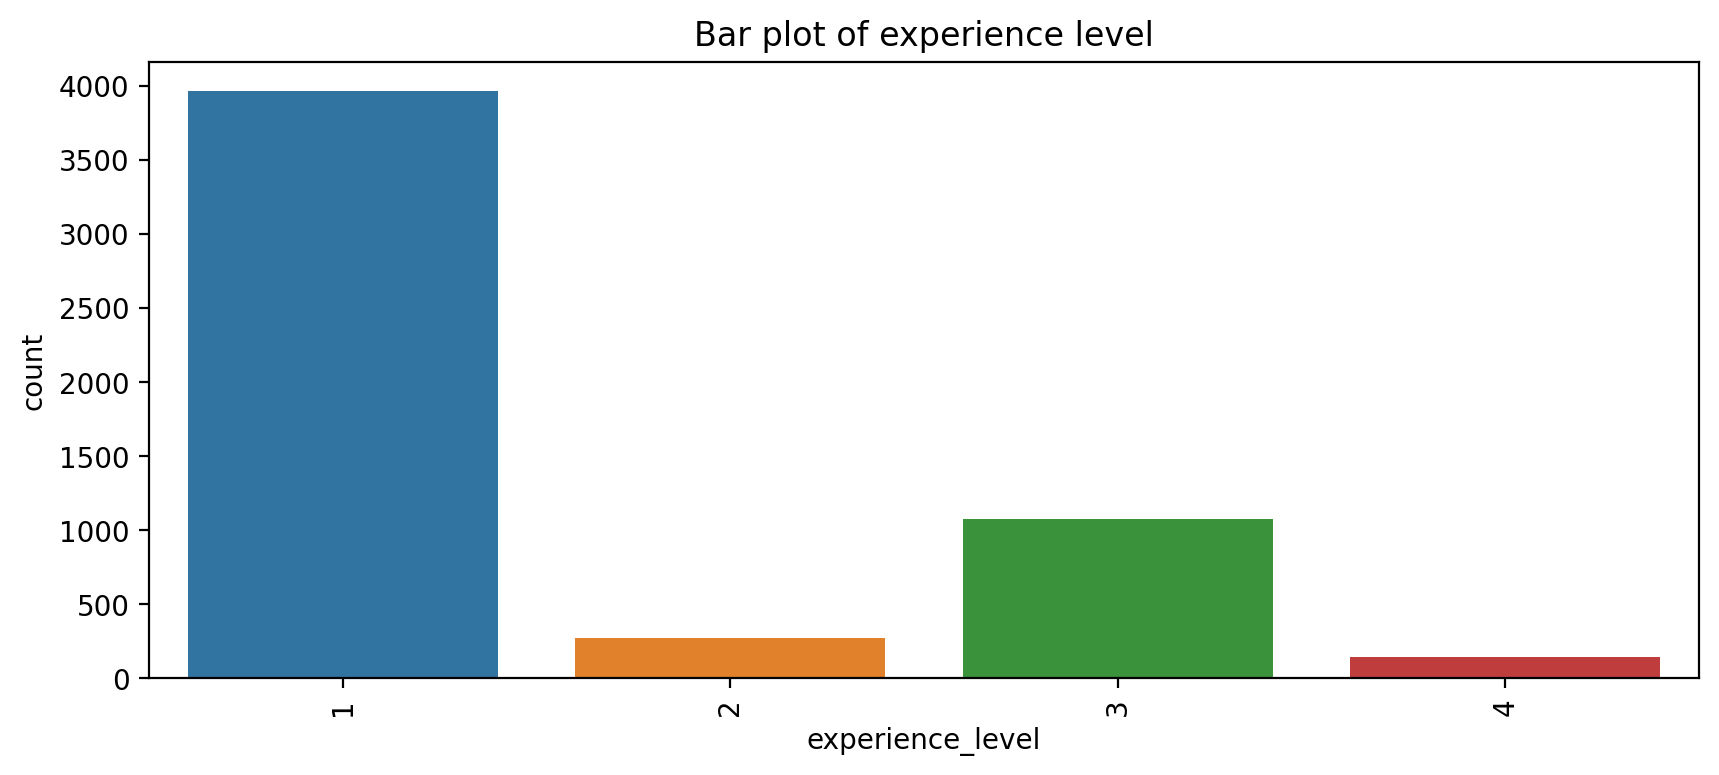

In [386]:
#Exploratory data analisis 
plt.figure(figsize=(10,4),dpi=200)
plt.title("Bar plot of experience level")
sns.countplot(data=df_full_train,x="experience_level")
plt.xticks(rotation=90);

/var/folders/j4/3bcsts1575195393dj3gg_cw0000gn/T/ipykernel_6067/1196504901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_full_train.corr()


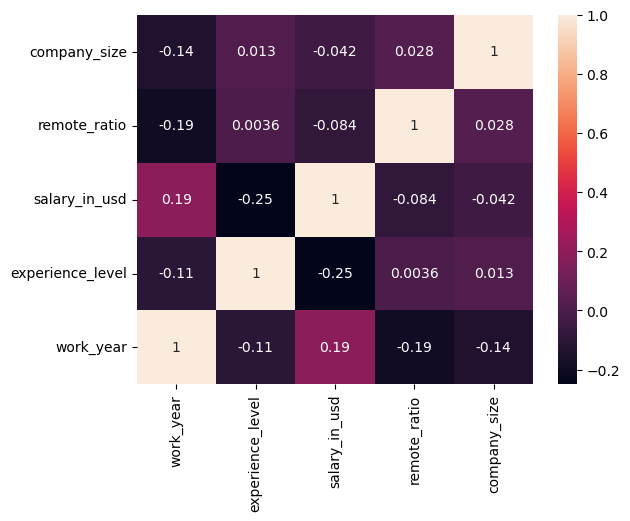

In [387]:
#Correlation Matrix between features
corr_matrix = df_full_train.corr()
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set(ylim=(0,len(corr_matrix)))
heatmap.set(xlim=(0,len(corr_matrix)))
plt.show()

In [393]:
#delete salaries over 300.000 USD/year, we consider this outliers
df=df[(df["salary_in_usd"]<300000)]

In [392]:
#separate columns in numerical and categorical again
categorical_columns = df.select_dtypes(include="object").columns.values
numerical_columns = df.select_dtypes(include="int64").columns.values

## Models to try

* Random Forest for Regression
* Gradient Boosting Regressor
* Polynomial regression won't be consider given the exploratory analysis result

## Procedure

* Split data in train, val and test sets
* For each model, find the best hyperparameters using the train and validation set with cv=5 in train set
* Measure performance of each model using RMSE and the val set
* Choose the best model
* Train the data with new grid, using a range of params close to the best ones find before. We use train and val set for this
* Choose the best model
* Measure final performance of the model using RMSE and the test set
* Save final model

In [399]:
#Split data in train, val and test sets
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=42)

y_full_train = df_full_train.salary_in_usd
y_test = df_test.salary_in_usd
y_train = df_train.salary_in_usd
y_val = df_val.salary_in_usd

X_full_train = df_full_train.drop("salary_in_usd",axis=1)
X_test = df_test.drop("salary_in_usd",axis=1)
X_train = df_train.drop("salary_in_usd",axis=1)
X_val = df_val.drop("salary_in_usd",axis=1)

dv = DictVectorizer(sparse=False)
dicts_full_train = X_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_train = X_train.to_dict(orient='records')
X_train = dv.transform(dicts_train)

dicts_val = X_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

dicts_test = X_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [395]:
#For each model, find the best hyperparameters using the validation set
def model_train_and_performance (model, X_train, y_train, X_test, y_test):
    final_model = model.fit(X_train, y_train)
    print("Best Params:", final_model.best_params_)
    y_pred = final_model.predict(X_test)
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    print("RMSE:", rmse)
    return (final_model, rmse)

In [396]:
#Random Forest 
rf = RandomForestRegressor()
rf_param_grid = {'n_estimators':[50,100,150,200,250], 'max_depth':[4,8,16,32,64], 'max_features':["sqrt"], 'bootstrap':[True], 'random_state':[42]}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
rf_model, rf_rmse = model_train_and_performance(rf_grid, X_train, y_train, X_val, y_val)

Best Params: {'bootstrap': True, 'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}
RMSE: 44380.06


In [333]:
#Gradient Boosting Regressor
grad_boost = GradientBoostingRegressor()
grad_boost_param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3], 'n_estimators':[50,100,150,200,250],'max_depth':[4,8,16,32,64], 'max_features':["sqrt"],'random_state':[42]}
grad_boost_grid = GridSearchCV(grad_boost, grad_boost_param_grid, cv=5)
grad_boost_model, grad_boost_rmse = model_train_and_performance(grad_boost_grid, X_train, y_train, X_val, y_val)

Best Params: {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
RMSE: 44311.85


In [397]:
#Gradient Boosting Regressor around best hyperparameters
grad_boost = GradientBoostingRegressor()
grad_boost_param_grid = {'learning_rate':[0.03, 0.04, 0.05, 0.06, 0.07], 'n_estimators':[180,190,200,210,220],'max_depth':[6,7,8,9,10], 'max_features':["sqrt"],'random_state':[42]}
grad_boost_grid = GridSearchCV(grad_boost, grad_boost_param_grid, cv=5)
grad_boost_model, grad_boost_rmse = model_train_and_performance(grad_boost_grid, X_train, y_train, X_val, y_val)

Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 210, 'random_state': 42}
RMSE: 44333.69


In [400]:
#final model 
grad_boost_final_model = GradientBoostingRegressor(learning_rate=0.07, max_depth=7, max_features='sqrt', n_estimators=210)
grad_boost_final_model.fit(X_full_train, y_full_train)

#final model evaluation
y_pred = grad_boost_final_model.predict(X_test)
final_rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
print("RMSE test set:", final_rmse)

RMSE test set: 44313.81


In [402]:
#Saving the model
output_file = "final_model.bin"
with open(output_file, 'wb') as f_out: 
    pickle.dump(grad_boost_final_model, f_out)

In [403]:
#Saving the dic vec
output_file = "dv.bin"
with open(output_file, 'wb') as f_out: 
    pickle.dump(dv, f_out)